In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from pathlib import Path
from scipy import signal
from sklearn.preprocessing import StandardScaler

In [3]:
!pip install mne
import mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 12.3 MB/s eta 0:00:00


In [ ]:
#Loading npy arrays into mne

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Loading patient 0 nights 1 and 2 data
p00_n1_X = np.load('/content/drive/MyDrive/Datathon2024/p00_n1_X.npy')
p00_n1_Y = np.load('/content/drive/MyDrive/Datathon2024/p00_n1_y.npy')
p00_n2_X = np.load('/content/drive/MyDrive/Datathon2024/p00_n2_X.npy')
p00_n2_Y = np.load('/content/drive/MyDrive/Datathon2024/p00_n2_y.npy')

# Older FFT


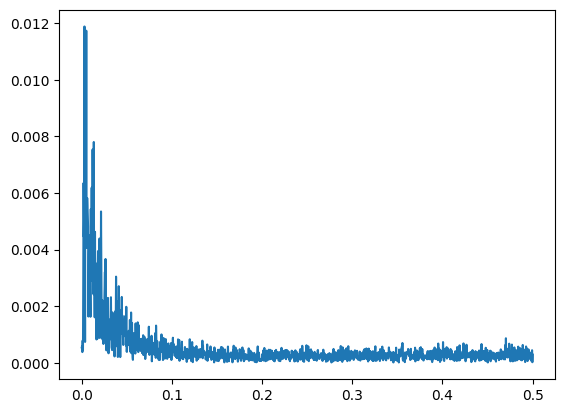

In [11]:
p00_n1_fft = np.fft.fft(p00_n1_X[6, 1, :])
mag_sample_fft = np.absolute(p00_n1_fft)
range_pass = int((np.shape(mag_sample_fft)[0])/2)
f_dft_range = np.linspace(0, 0.5, range_pass)
plt.plot(f_dft_range, mag_sample_fft[:range_pass])

In [ ]:
#Now using different types of wave (alpha, beta, sigma, etc.) compute power of each of these frequency ranges for each night of study,
#Outputting length 5 vector of powers (which should be normalized afterwards when passed to the model). Do this over each epoch;
#If N epochs, function output from all epochs is size 5xN. Only computed on EEG waves right now.

#First: do on one epoch;
#Then: expand to all epochs
  #patient_epoch: a 2D ndarray of (channels)x(data)
  #Sampling width =

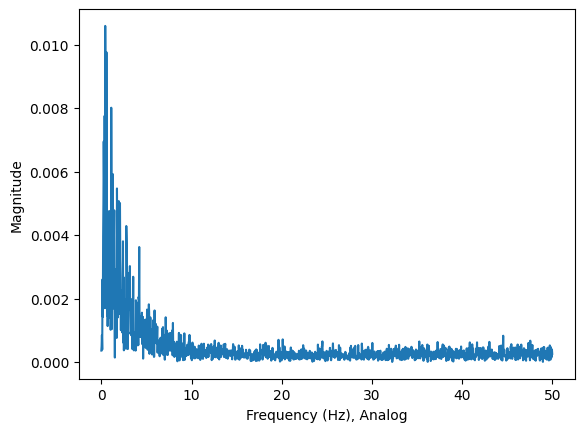

In [12]:
#From previous research
#create a function to automate this process with a subject and segment of our choice
def return_study_spectrum(epoch_num, channel_num,
                        analog_plot=False, segment_num=None, multi_segment=False,
                        seg_start=None, seg_end=None):
  if analog_plot:
    dft_range = np.linspace(0, 50, 1500)
    frequency_type = 'Analog'
  else:
    dft_range = np.linspace(0, 0.5, 1500)
    frequency_type = 'Digital'
  if not multi_segment:
    segment_fft = np.fft.fft(p00_n1_X[epoch_num, channel_num, :])
    mag_segment_fft = np.absolute(segment_fft)
    plt.plot(dft_range, mag_segment_fft[:1500])
    plt.xlabel(f'Frequency (Hz), {frequency_type}')
    plt.ylabel('Magnitude')
    return segment_fft
  else:
    plots_needed = (seg_end-seg_start) + 1
    fig, axs = plt.subplots(plots_needed, sharex=True, sharey=True)
    fig.suptitle(f'Spectrums for {plots_needed} Leads, {frequency_type}')
    for i in range(plots_needed):
      multisegment_fft = np.fft.fft(p00_n1_X[epoch_num, channel_num, :])
      magmulti_fft = np.absolute(multisegment_fft)
      axs[i].plot(dft_range, magmulti_fft[:2500])
    return None


one_channel_spectrum = return_study_spectrum(4, 0, analog_plot=True)

In [13]:
#Filter down to only EEG data
def get_EEGs(patient_ndarray):
  return patient_ndarray[:, :2, :1500]

p00_n1_X_EEG = get_EEGs(p00_n1_X)

def power_matrix_waves(EEG_study):
  epochs = EEG_study.shape[0]
  power_matrix = np.zeros((5, epochs))
  #Down: Alpha, beta, delta, theta, sigma
  #Across: Each epoch's power vector: summarizing for one study in the night
  #Alpha processing: 8 to 12 Hz, Channel 1 (back of head)
  #Beta processing: 13 to 30Hz, Channel 0
  #Delta processing: 0.5 to 4Hz, Channel 0
  #Theta processing: 4 to 7Hz, Channel 0
  #Sigma processing: 12 to 16Hz, Channel 0
  for epoch in range(epochs):
    alpha = 0
    beta = 0
    delta = 0
    theta = 0
    sigma = 0
    for alpha_sample in range(239, 360):
      alpha += (EEG_study[epoch, 1, alpha_sample])**2
      print(alpha)

    '''
    power_matrix[0, epoch] = alpha
    for beta_sample in range(389, 900):
      beta += (EEG_study[epoch, 0, beta_sample])**2
    power_matrix[1, epoch] = beta
    for delta_sample in range(14, 121):
      delta += (EEG_study[epoch, 0, delta_sample])**2
    power_matrix[2, epoch] = delta
    for theta_sample in range(119, 209):
      theta += (EEG_study[epoch, 0, theta_sample])**2
    power_matrix[3, epoch] = theta
    for sigma_sample in range(359, 481):
      sigma += (EEG_study[epoch, 0, sigma_sample])**2
    power_matrix[4, epoch] = sigma
    '''

    return power_matrix

p00_n1_EEG_power = power_matrix_waves(p00_n1_X_EEG)

'''
zero_epochs = []
for epoch in range(p00_n1_EEG_power.shape[1]):
  if np.all(np.isclose(p00_n1_EEG_power[:, epoch], np.zeros(5), rtol = 1e-14)):
    zero_epochs.append(epoch)
'''


2.1545919574930562e-11
2.726379905808477e-11
7.738812435427818e-11
1.329643301265279e-10
1.396143053039756e-10
1.4077722658294085e-10
1.4605543828576792e-10
1.4607522333588265e-10
2.0886198070549714e-10
2.6584512337479365e-10
2.7249509855224133e-10
2.801475162688349e-10
2.806421425217029e-10
3.0048215110896423e-10
3.295551830830951e-10
3.908646567108105e-10
7.842112380415677e-10
7.952930644447128e-10
8.389982401481303e-10
8.507131881549464e-10
8.507681466274873e-10
8.840268158703324e-10
9.162126957291793e-10
1.0355583163600747e-09
1.0485922677078722e-09
1.078685328932362e-09
1.089767155335507e-09
1.121953035194354e-09
1.138592262340834e-09
1.1774786791718661e-09
1.33655268043312e-09
1.3993394378027345e-09
2.1776063674542793e-09
2.1899720237759798e-09
2.3374387956365976e-09
2.4193247213836223e-09
2.453673766721679e-09
2.724511317742087e-09
2.7829189840196434e-09
2.9716441803861584e-09
3.0604592703511384e-09
3.2390193476364903e-09
3.2904802629848783e-09
3.4098258836157734e-09
3.529171504

'\nzero_epochs = []\nfor epoch in range(p00_n1_EEG_power.shape[1]):\n  if np.all(np.isclose(p00_n1_EEG_power[:, epoch], np.zeros(5), rtol = 1e-14)):\n    zero_epochs.append(epoch)\n'

#New MNE Library PSD

In [7]:
#Filter down to only EEG data
def get_EEGs(patient_ndarray):
  return patient_ndarray[:, :2, :]

p00_n1_X_EEG = get_EEGs(p00_n1_X)
p00_n2_X_EEG = get_EEGs(p00_n2_X)

Creating RawArray with float64 data, n_channels=2, n_times=3000
    Range : 0 ... 2999 =      0.000 ...    29.990 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 20.480 (s)


<ipython-input-8-cc80f09724a0>:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


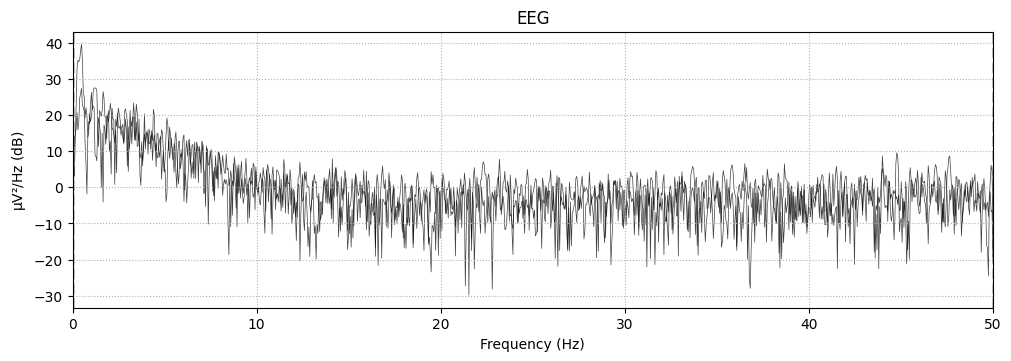

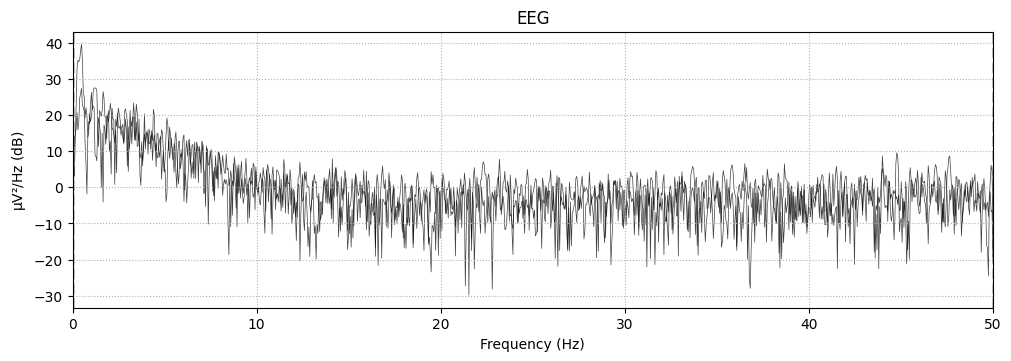

In [8]:
#Power spectral density using MNE processing only EEG
#Let's do epoch 0 first of p00_n1_X_EEG
data = p00_n1_X_EEG[0, :, :]
sfreq = 100
channel_names = ['Fpz-Cz', 'Pz-Oz']
channel_types = ['eeg'] * 2
info = mne.create_info(ch_names=channel_names, sfreq=sfreq, ch_types=channel_types)

raw = mne.io.RawArray(data, info)

raw.plot_psd()

In [9]:
freqs, psd = signal.welch(data, fs=raw.info['sfreq']) #Don't use this
print(freqs)

[ 0.        0.390625  0.78125   1.171875  1.5625    1.953125  2.34375
  2.734375  3.125     3.515625  3.90625   4.296875  4.6875    5.078125
  5.46875   5.859375  6.25      6.640625  7.03125   7.421875  7.8125
  8.203125  8.59375   8.984375  9.375     9.765625 10.15625  10.546875
 10.9375   11.328125 11.71875  12.109375 12.5      12.890625 13.28125
 13.671875 14.0625   14.453125 14.84375  15.234375 15.625    16.015625
 16.40625  16.796875 17.1875   17.578125 17.96875  18.359375 18.75
 19.140625 19.53125  19.921875 20.3125   20.703125 21.09375  21.484375
 21.875    22.265625 22.65625  23.046875 23.4375   23.828125 24.21875
 24.609375 25.       25.390625 25.78125  26.171875 26.5625   26.953125
 27.34375  27.734375 28.125    28.515625 28.90625  29.296875 29.6875
 30.078125 30.46875  30.859375 31.25     31.640625 32.03125  32.421875
 32.8125   33.203125 33.59375  33.984375 34.375    34.765625 35.15625
 35.546875 35.9375   36.328125 36.71875  37.109375 37.5      37.890625
 38.28125  38.6718

In [10]:
def power_matrix(EEG_study):
  epochs = EEG_study.shape[0]
  matrix = np.zeros((5, epochs))
  for epoch in range(epochs):
    alpha = 0
    beta = 0
    delta = 0
    theta = 0
    sigma = 0

    data = EEG_study[epoch, :, :]
    sfreq = 100
    channel_names = ['Fpz-Cz', 'Pz-Oz']
    channel_types = ['eeg'] * 2
    info = mne.create_info(ch_names=channel_names, sfreq=sfreq, ch_types=channel_types)
    raw = mne.io.RawArray(data, info)
    freqs, psd = signal.welch(data, fs=raw.info['sfreq'])

    #Down: Alpha, beta, delta, theta, sigma
    #Across: Each epoch's power vector: summarizing for one study in the night
    #Alpha processing: 8 to 12 Hz, Channel 1 (back of head)
    #Beta processing: 13 to 30Hz, Channel 0
    #Delta processing: 0.5 to 4Hz, Channel 0
    #Theta processing: 4 to 7Hz, Channel 0
    #Sigma processing: 12 to 16Hz, Channel 0

    for alpha_sample in range(21, 31):
      alpha += psd[1][alpha_sample]
    matrix[0, epoch] = alpha
    for beta_sample in range(34, 77):
      beta += psd[0][beta_sample]
    matrix[1, epoch] = beta
    for delta_sample in range(2, 11):
      delta += psd[0][delta_sample]
    matrix[2, epoch] = delta
    for theta_sample in range(11, 18):
      theta += psd[0][theta_sample]
    matrix[3, epoch] = theta
    for sigma_sample in range(31, 41):
      sigma += psd[0][sigma_sample]
    matrix[4, epoch] = sigma

  return matrix

#p00_n1_EEG_power = power_matrix(p00_n1_X_EEG)
p00_n2_EEG_power = power_matrix(p00_n2_X_EEG)

Streaming output truncated to the last 5000 lines.
    Range : 0 ... 2999 =      0.000 ...    29.990 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=3000
    Range : 0 ... 2999 =      0.000 ...    29.990 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=3000
    Range : 0 ... 2999 =      0.000 ...    29.990 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=3000
    Range : 0 ... 2999 =      0.000 ...    29.990 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=3000
    Range : 0 ... 2999 =      0.000 ...    29.990 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=3000
    Range : 0 ... 2999 =      0.000 ...    29.990 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=3000
    Range : 0 ... 2999 =      0.000 ...    29.990 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=3000
    Range : 0 ... 2999 =      0.000 ...    29.990 secs
Ready.
Creat

In [11]:
print(p00_n2_EEG_power[:, 1200]) #Example of one epoch's power across Alpha, Beta, Delta, Theta, Sigma in this file


[1.14641400e-11 2.19134173e-11 1.06782890e-09 2.68212152e-11
 7.84964765e-12]


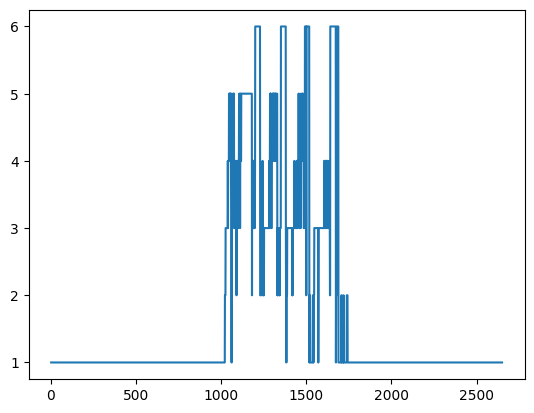

In [ ]:
#Plotting sleep stage labels (one example)
samples_p00_n1 = np.linspace(1, 2650, 2650)
plt.plot(samples_p00_n1, p00_n1_Y)